In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [9]:
X = data[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']]

In [8]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
from sklearn.preprocessing import OneHotEncoder

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
enc = OneHotEncoder(drop = 'if_binary')

In [10]:
enc.fit(X)

OneHotEncoder(drop='if_binary')

In [11]:
enc.categories_

[array(['16-25', '26-39', '40-64', '65+'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['majority', 'minority'], dtype=object),
 array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object),
 array(['high school', 'none', 'university'], dtype=object),
 array(['middle class', 'poverty', 'upper class', 'working class'],
       dtype=object),
 array([0.05335755, 0.06086662, 0.06481035, ..., 0.91588318, 0.96081883,
               nan]),
 array([0., 1.]),
 array(['after 2015', 'before 2015'], dtype=object),
 array([0., 1.]),
 array([0., 1.]),
 array([10238, 21217, 32765, 92101]),
 array([ 2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,  9000.,
        10000., 11000., 12000., 13000., 14000., 15000., 16000., 17000.,
        18000., 19000., 20000., 21000., 22000.,    nan]),
 array(['sedan', 'sports car'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 22]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([ 0,  1,  2,

In [14]:
enc.fit_transform(X).toarray().shape

(10000, 9110)

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
data['ANNUAL_MILEAGE'] = imputer.fit_transform(data[['ANNUAL_MILEAGE']])
data['CREDIT_SCORE'] = imputer.fit_transform(data[['CREDIT_SCORE']])

In [17]:
enc = OneHotEncoder(handle_unknown='ignore').fit(data[['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','POSTAL_CODE']])

In [18]:
data[enc.get_feature_names()]=enc.transform(data[['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','POSTAL_CODE']]).toarray()


/home/kate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
data.drop(['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','POSTAL_CODE'],axis=1,inplace=True)


In [22]:
data.VEHICLE_TYPE.value_counts()

sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64

In [25]:
enc = OneHotEncoder(handle_unknown='ignore').fit(data[['VEHICLE_YEAR','VEHICLE_TYPE']])

In [26]:
data[enc.get_feature_names()]=enc.transform(data[['VEHICLE_YEAR','VEHICLE_TYPE']]).toarray()


/home/kate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
data.drop(['VEHICLE_YEAR','VEHICLE_TYPE'],axis=1,inplace=True)

In [28]:
data

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,x5_upper class,x5_working class,x6_10238,x6_21217,x6_32765,x6_92101,x0_after 2015,x0_before 2015,x1_sedan,x1_sports car
0,569520,0.629027,1.0,0.0,1.0,12000.000000,0,0,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,750365,0.357757,0.0,0.0,0.0,16000.000000,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,199901,0.493146,1.0,0.0,0.0,11000.000000,0,0,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,478866,0.206013,1.0,0.0,1.0,11000.000000,0,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,731664,0.388366,1.0,0.0,0.0,12000.000000,2,0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,0.582787,1.0,0.0,0.0,16000.000000,0,0,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,910346,0.522231,1.0,0.0,1.0,11697.003207,1,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9997,468409,0.470940,1.0,0.0,1.0,14000.000000,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9998,903459,0.364185,0.0,0.0,1.0,13000.000000,2,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   CREDIT_SCORE         10000 non-null  float64
 2   VEHICLE_OWNERSHIP    10000 non-null  float64
 3   MARRIED              10000 non-null  float64
 4   CHILDREN             10000 non-null  float64
 5   ANNUAL_MILEAGE       10000 non-null  float64
 6   SPEEDING_VIOLATIONS  10000 non-null  int64  
 7   DUIS                 10000 non-null  int64  
 8   PAST_ACCIDENTS       10000 non-null  int64  
 9   OUTCOME              10000 non-null  float64
 10  x0_16-25             10000 non-null  float64
 11  x0_26-39             10000 non-null  float64
 12  x0_40-64             10000 non-null  float64
 13  x0_65+               10000 non-null  float64
 14  x1_female            10000 non-null  float64
 15  x1_male              10000 non-null  

In [34]:
data.columns

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME', 'x0_16-25', 'x0_26-39', 'x0_40-64', 'x0_65+', 'x1_female',
       'x1_male', 'x2_majority', 'x2_minority', 'x3_0-9y', 'x3_10-19y',
       'x3_20-29y', 'x3_30y+', 'x4_high school', 'x4_none', 'x4_university',
       'x5_middle class', 'x5_poverty', 'x5_upper class', 'x5_working class',
       'x6_10238', 'x6_21217', 'x6_32765', 'x6_92101', 'x0_after 2015',
       'x0_before 2015', 'x1_sedan', 'x1_sports car'],
      dtype='object')

In [32]:
y = data['OUTCOME']

In [35]:
X = data[['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
        'x0_16-25', 'x0_26-39', 'x0_40-64', 'x0_65+', 'x1_female',
       'x1_male', 'x2_majority', 'x2_minority', 'x3_0-9y', 'x3_10-19y',
       'x3_20-29y', 'x3_30y+', 'x4_high school', 'x4_none', 'x4_university',
       'x5_middle class', 'x5_poverty', 'x5_upper class', 'x5_working class',
       'x6_10238', 'x6_21217', 'x6_32765', 'x6_92101', 'x0_after 2015',
       'x0_before 2015', 'x1_sedan', 'x1_sports car']]

In [30]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_train

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,x0_16-25,x0_26-39,...,x5_upper class,x5_working class,x6_10238,x6_21217,x6_32765,x6_92101,x0_after 2015,x0_before 2015,x1_sedan,x1_sports car
9069,0.303011,1.0,1.0,1.0,10000.000000,4,0,6,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2603,0.558915,0.0,1.0,1.0,12000.000000,5,0,2,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7738,0.507934,1.0,1.0,1.0,9000.000000,3,0,6,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1579,0.330857,1.0,0.0,1.0,11697.003207,3,1,2,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5058,0.478385,1.0,0.0,0.0,13000.000000,0,0,0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.693325,1.0,1.0,1.0,14000.000000,3,1,3,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5191,0.521957,1.0,0.0,0.0,11000.000000,0,0,0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5390,0.626010,1.0,1.0,1.0,11697.003207,0,0,2,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
860,0.740884,1.0,1.0,1.0,8000.000000,1,0,5,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier(max_depth=8)

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [43]:
from sklearn.metrics import roc_auc_score

In [70]:
from sklearn.metrics import confusion_matrix

In [60]:
y_pred = clf.predict(X_test)

In [62]:
y_proba = clf.predict_proba(X_test)

In [54]:
roc_auc_score(y_test, clf.predict(X_test), multi_class='ovr')

0.8225869114359781

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


In [68]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr


In [72]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

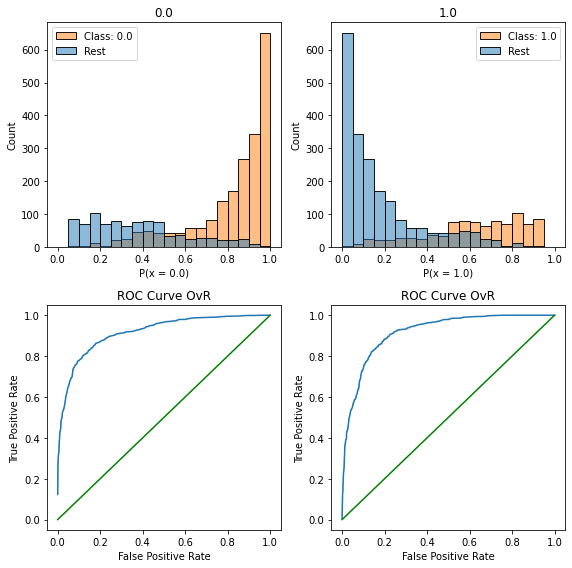

In [73]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = clf.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [74]:


# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")



0.0 ROC AUC OvR: 0.9164
1.0 ROC AUC OvR: 0.9164
average ROC AUC OvR: 0.9164
